In [35]:
%run "../PyUtils/common.ipynb"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [256]:
%%R -i tt -w 1200 -h 500 -u px  # Pass in Pandas Dataframe into R
require(ggplot2)
require(gridExtra)
require("TTR")
require("forecast")
require("arima")

library("forecast")


plotForecastErrors <- function(forecasterrors)
{
    # make a histogram of the forecast errors:
    mybinsize <- IQR(forecasterrors)/4
    mysd <- sd(forecasterrors)
    mymin <- min(forecasterrors) - mysd*5
    mymax <- max(forecasterrors) + mysd*3
    # generate normally distributed data with mean 0 and standard deviation mysd
    mynorm <- rnorm(10000, mean=0, sd=mysd)
    mymin2 <- min(mynorm)
    mymax2 <- max(mynorm)
    if (mymin2 < mymin) { mymin <- mymin2 }
    if (mymax2 > mymax) { mymax <- mymax2 }
    # make a red histogram of the forecast errors, with the normally distributed data overlaid:
    mybins <- seq(mymin, mymax, mybinsize)
    hist(forecasterrors, col="red", freq=FALSE, breaks=mybins)

    # freq=FALSE ensures the area under the histogram = 1
    # generate normally distributed data with mean 0 and standard deviation mysd
    myhist <- hist(mynorm, plot=FALSE, breaks=mybins)
    # plot the normal curve as a blue line on top of the histogram of forecast errors:
    points(myhist$mids, myhist$density, type="l", col="blue", lwd=2)
}


In [32]:
f1="http://robjhyndman.com/tsdldata/data/nybirths.dat"
f2="http://robjhyndman.com/tsdldata/misc/kings.dat"
f3="http://robjhyndman.com/tsdldata/data/fancy.dat"
df1 = LoadDataSet(f1, headers=None, checkForDateTime=False, names=['births']);
df2 = LoadDataSet(f2);
df3 = LoadDataSet(f3, names=['souvenir']);


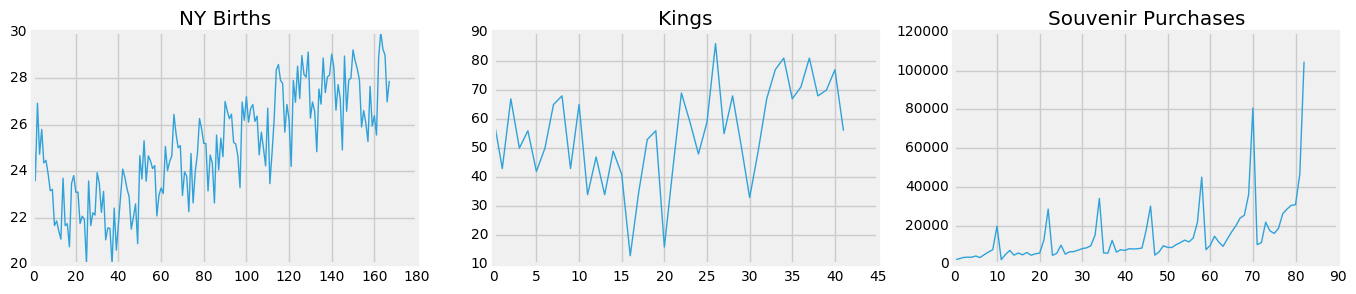

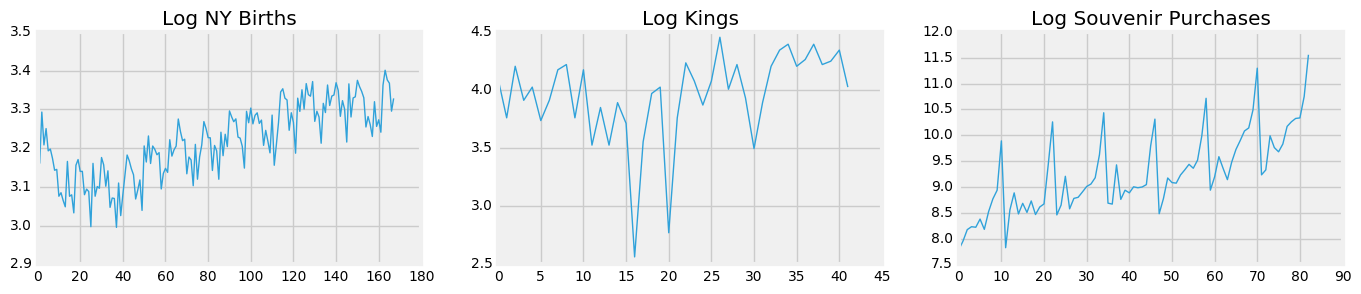

In [33]:
def plotts(df, title="", num=None):
    if ( not num is None): plt.subplot(num)
    plt.plot(df )
    plt.title(title)

plt.figure(figsize=(15,3))
plotts(df1, "NY Births", 131)
plotts(df2, "Kings", 132)
plotts(df3, "Souvenir Purchases", 133)

plt.show()

plt.figure(figsize=(15,3))
plotts(log(df1), "Log NY Births", 131)
plotts(log(df2), "Log Kings", 132)
plotts(log(df3), "Log Souvenir Purchases", 133)
#plotts(l, "log of Souvennir", 131)

In [50]:
ff="../data/AirPassengers.csv"
df1 = LoadDataSet(ff);
df1['Month'] = pd.to_datetime(df1.Month)
df1 = df1.set_index(df1.Month)
df1 = df1.drop(['Month'], 1)
df1.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01', '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01', '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'], dtype='datetime64[ns]', name='Month', length=144, freq=None)